# Feature selection by category or reference paper
This tests all feature sets by classifier

Separating Severity 2 v 3

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split

from sklearn import metrics
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import balanced_accuracy_score, precision_score, recall_score

from sklearn.preprocessing import StandardScaler  

from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.svm import LinearSVC
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB


In [2]:
data = pd.read_csv("OSA_complete_patients.csv", index_col = 0)
# this data file was created using the RF_no_nan_data.ipynb file which should be in the missing value imputation folder

In [3]:
data.head()

,PatientID,Sex,Age,Current_smoker,Former_smoker,Sedentary,Height,Weight,Cervical_perimeter,Abdominal_perimeter,...,Nocturnal_perspiration,Shortness_of_breath_on_exertion,Nocturia,Drowsiness_accident,Near_miss_accident,Respiratory_arrest,Epworth_scale,Pichots_scale,Depression_scale,Severity
39,23,2.0,57.883641,0.0,0.0,0.0,172.0,90.0,45.0,125.0,...,0.0,0.0,1.0,0.0,0.0,0.0,3.0,4.0,5.0,3
41,24,2.0,60.796715,0.0,0.0,0.0,156.0,85.0,35.0,113.0,...,0.0,1.0,1.0,0.0,0.0,1.0,19.0,17.0,4.0,3
46,28,1.0,63.438741,0.0,0.0,0.0,178.0,68.0,35.0,73.0,...,0.0,0.0,1.0,0.0,0.0,1.0,5.0,3.0,0.0,1
55,32,1.0,28.736482,0.0,0.0,0.0,180.0,69.0,36.0,83.0,...,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0
56,33,1.0,56.802190,0.0,0.0,0.0,185.0,118.0,43.0,106.0,...,0.0,0.0,0.0,0.0,0.0,1.0,12.0,13.0,2.0,3


In [4]:
features = ['Sex', 'Age', 'Current_smoker', 'Former_smoker',
       'Sedentary', 'Height', 'Weight', 'Cervical_perimeter',
       'Abdominal_perimeter', 'Systolic_BP', 'Diastolic_BP',
       'Maxillofacial_profile', 'BMI', 'High_BP', 'Asthma', 'Rhinitis', 'COPD',
       'Respiratory_fail', 'Myocardial_infarct', 'Coronary_fail',
       'Arrhythmias', 'Stroke', 'Heart_fail', 'Arteriopathy', 'Gastric_reflux',
       'Glaucoma', 'Diabetes', 'Hypercholesterolemia', 'Hypertriglyceridemia',
       'Hypo(er)thyroidism', 'Depression', 'Obesity', 'Dysmorphology',
       'Restless_Leg_Syndrome', 'Snoring', 'Diurnal_somnolence',
       'Driving_drowsiness', 'Morning_fatigue', 'Morning_headache',
       'Memory_problem', 'Nocturnal_perspiration',
       'Shortness_of_breath_on_exertion', 'Nocturia', 'Drowsiness_accident',
       'Near_miss_accident', 'Respiratory_arrest', 'Epworth_scale',
       'Pichots_scale', 'Depression_scale']

### Wu et al. [25] 
age; body mass index; Epworth Sleepiness
Scale; waistline; neck circumference; and
difference of blood pressure before going
to sleep and early in the morning

In [5]:
wu = ['Age','BMI','Epworth_scale',  'Abdominal_perimeter', 'Cervical_perimeter','Systolic_BP', 'Diastolic_BP']
# The Wu paper included a feature described as "The difference of blood presure before going to sleep and early in the morning." 
# This dataset did not include that feature, so it is substituted here with disastolic and systolic BP

### Mencar et al. [15]
body mass index; gender; and Epworth
Sleepiness Scale

In [6]:
mencar = ['BMI', 'Sex', 'Epworth_scale']

### Huang et al. [12] 
age; waistline; neck circumference; snoring;
sleep onset latency; and witnessed apnea

In [7]:
huang = ['Age','Cervical_perimeter', 'Snoring']
# The Huang paper included the features: sleep onset latency and witnessed apnea
# This dataset did not included sleep onset latency data, and including results for witnessed apnea would skew the results so it was not included

### Ustun et al. [21] 
age; body mass index; gender; diabetes; hypertension; and tabagism (smoker status)

In [8]:
ustun = ['Age','BMI', 'Sex','Diabetes', 'High_BP', 'Current_smoker', 'Former_smoker']

### Rodruiges Jr et al.
age; nocturia frequency; body mass index;
depression score; neck circumference; hip
measurement; diastolic blood pressure; and
tabagism

In [9]:
rodruiges = ['Age', 'Nocturia', 'BMI', 'Depression_scale', 'Cervical_perimeter', 'Abdominal_perimeter', 'Diastolic_BP', 'Current_smoker', 'Former_smoker' ]

### Categories

In [10]:
demographic = ['Sex','Age','Current_smoker','Former_smoker','Sedentary']

In [11]:
measurements = ['Height','Weight','Cervical_perimeter',
               'Abdominal_perimeter','Systolic_BP','Diastolic_BP','Maxillofacial_profile','BMI','High_BP']

In [12]:
comorbidities = ['Asthma','Rhinitis','COPD','Respiratory_fail','Myocardial_infarct','Coronary_fail','Arrhythmias','Stroke',
                 'Heart_fail','Arteriopathy','Gastric_reflux','Glaucoma','Diabetes','Hypercholesterolemia','Hypertriglyceridemia',
                 'Hypo(er)thyroidism','Depression','Obesity','Dysmorphology','Restless_Leg_Syndrome']

In [13]:
symptoms=['Snoring','Diurnal_somnolence','Driving_drowsiness','Morning_fatigue','Morning_headache','Memory_problem',
          'Nocturnal_perspiration','Shortness_of_breath_on_exertion','Nocturia','Drowsiness_accident','Near_miss_accident',
          'Respiratory_arrest']

In [14]:
questionnaires = ['Epworth_scale','Pichots_scale','Depression_scale']

### Dataframe of only Severity 0 and 1

In [15]:
sev = [2,3]
data_2_3 = data[data['Severity'].isin(sev)]
print(data_2_3.shape)
print(data_2_3['Severity'].value_counts())

(13920, 51)
3    8778
2    5142
Name: Severity, dtype: int64


## Models

##### Note: Feature scaling is essential for machine learning algorithms that calculate distances between data

### Creating dictionary of feature sets

In [16]:
feature_list = {}

feature_list['All']= features
feature_list['Wu'] = wu
feature_list['Mencar'] = mencar
feature_list['Ustun'] = ustun
feature_list['Huang'] = huang
feature_list['Rodruiges'] = rodruiges
feature_list['Demographic'] = demographic
feature_list['Measurements'] = measurements
feature_list['Comorbidities'] = comorbidities
feature_list['Symptoms'] = symptoms
feature_list['Questionnaires'] = questionnaires


### Random Forests

In [17]:
accuracy, precision, recall = {}, {}, {}

for key in feature_list.keys():
    
    # Define X and y test/ train/ split
    X=data_2_3[feature_list[key]]  # Features  
    y=data_2_3['Severity']  # Labels
    X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.2, 
                                                    random_state=0, 
                                                    shuffle=True, 
                                                    stratify=y)
    clf=RandomForestClassifier(n_estimators=100, class_weight='balanced', random_state = 0)  #defining classifier method
    clf.fit(X_train,y_train)                   # training classifier 
    
    # Prediction 
    predictions = clf.predict(X_test)
    
    # Calculate Accuracy, Precision and Recall Metrics
    accuracy[key] = balanced_accuracy_score(predictions, y_test) 
    precision[key] = precision_score(predictions, y_test, average='weighted')
    recall[key] = recall_score(predictions, y_test, average='weighted')

In [18]:
df_model = pd.DataFrame(index=feature_list.keys())
df_model['Balanced Accuracy'] = accuracy.values()
df_model['Precision'] = precision.values()
df_model['Recall'] = recall.values()

df_model

,Balanced Accuracy,Precision,Recall
All,0.635414,0.756835,0.665230
Wu,0.610863,0.715671,0.649066
Mencar,0.532209,0.558100,0.561063
Ustun,0.574870,0.640960,0.615302
Huang,0.529795,0.561606,0.561782
Rodruiges,0.605707,0.706774,0.645115
Demographic,0.538148,0.566030,0.567888
Measurements,0.572554,0.685284,0.621049
Comorbidities,0.521379,0.532543,0.503233
Symptoms,0.528209,0.538057,0.545618


##### Confusion matrix for model with highest balanced accuracy

In [19]:
X=data_2_3[features]  # Features  
y=data_2_3['Severity']  # Labels
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.2, 
                                                    random_state=0, 
                                                    shuffle=True, 
                                                    stratify=y)
clf=RandomForestClassifier(n_estimators=100, class_weight='balanced', random_state = 0)  #defining classifier method
clf.fit(X_train,y_train)                   # training classifier 
    
# Prediction 
predictions = clf.predict(X_test)

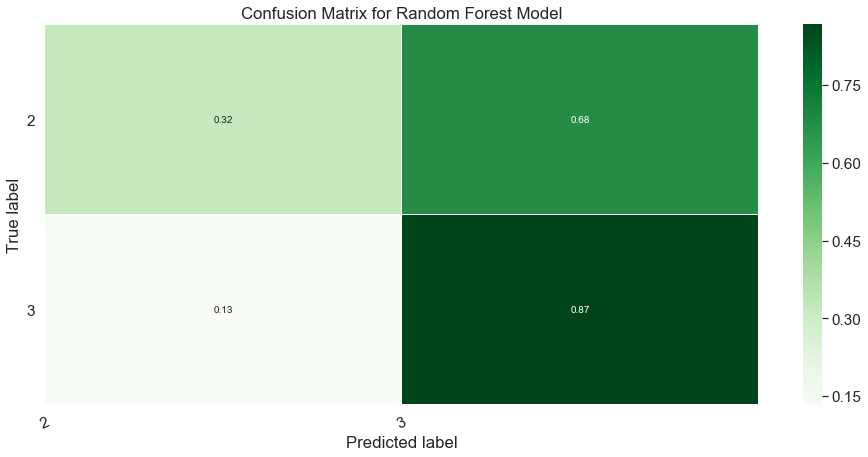

In [20]:
matrix = confusion_matrix(y_test, predictions)
matrix = matrix.astype('float') / matrix.sum(axis=1)[:, np.newaxis]

# Build the plot
plt.figure(figsize=(16,7))
sns.set(font_scale=1.4)
sns.heatmap(matrix, annot=True, annot_kws={'size':10},
            cmap=plt.cm.Greens, linewidths=0.2)

# Add labels to the plot
class_names = ['2', '3']
tick_marks = np.arange(len(class_names))
tick_marks2 = tick_marks + 0.5
plt.xticks(tick_marks, class_names, rotation=25)
plt.yticks(tick_marks2, class_names, rotation=0)
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.title('Confusion Matrix for Random Forest Model')
plt.show()

### MLP

In [21]:
accuracy, precision, recall = {}, {}, {}

for key in feature_list.keys():
    
    # Define X and y test/ train/ split
    X=data_2_3[feature_list[key]]  # Features  
    y=data_2_3['Severity']  # Labels
    X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.2, 
                                                    random_state=0, 
                                                    shuffle=True, 
                                                    stratify=y)
    # Data needs to be scaled
    scaler = StandardScaler()  
    # Scale only on training data
    scaler.fit(X_train)  
    X_train = scaler.transform(X_train)  
    # apply same transformation to test data
    X_test = scaler.transform(X_test)  
    
    clf=MLPClassifier(random_state=0, early_stopping=True)  #defining classifier method
    clf.fit(X_train,y_train)                   # training classifier 
    
    # Prediction 
    predictions = clf.predict(X_test)
    
    # Calculate Accuracy, Precision and Recall Metrics
    accuracy[key] = balanced_accuracy_score(predictions, y_test) 
    precision[key] = precision_score(predictions, y_test, average='weighted')
    recall[key] = recall_score(predictions, y_test, average='weighted')

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UserWarning: y_pred contains classes not in y_true
  warnings.warn('y_pred contains classes not in y_true')
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1145: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)


In [22]:
df_model = pd.DataFrame(index=feature_list.keys())
df_model['Balanced Accuracy'] = accuracy.values()
df_model['Precision'] = precision.values()
df_model['Recall'] = recall.values()

df_model

,Balanced Accuracy,Precision,Recall
All,0.616861,0.739329,0.653376
Wu,0.618546,0.742537,0.654454
Mencar,0.586788,0.851578,0.635776
Ustun,0.621988,0.765443,0.655891
Huang,0.611477,0.745823,0.649784
Rodruiges,0.625340,0.750324,0.658764
Demographic,0.617967,0.869048,0.645833
Measurements,0.592038,0.750071,0.637931
Comorbidities,0.547220,0.942846,0.628233
Symptoms,0.599340,0.897937,0.637931


##### Confusion matrix for model with highest balanced accuracy

In [41]:
X=data_2_3[rodruiges]  # Features  
y=data_2_3['Severity']  # Labels
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.2, 
                                                    random_state=0, 
                                                    shuffle=True, 
                                                    stratify=y)
 # Data needs to be scaled
scaler = StandardScaler()  
    # Scale only on training data
scaler.fit(X_train)  
X_train = scaler.transform(X_train)  
    # apply same transformation to test data
X_test = scaler.transform(X_test)  
    
clf=MLPClassifier(random_state=0, early_stopping=True)  #defining classifier method
clf.fit(X_train,y_train)                   # training classifier 
    
# Prediction 
predictions = clf.predict(X_test)

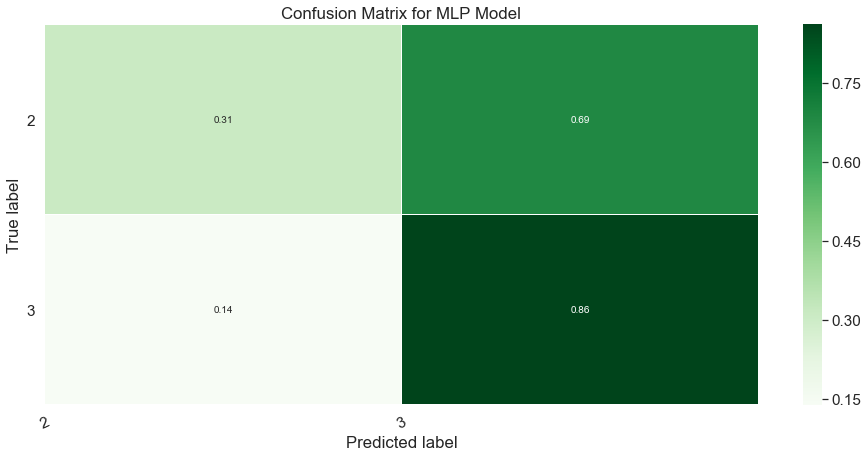

In [42]:
matrix = confusion_matrix(y_test, predictions)
matrix = matrix.astype('float') / matrix.sum(axis=1)[:, np.newaxis]

# Build the plot
plt.figure(figsize=(16,7))
sns.set(font_scale=1.4)
sns.heatmap(matrix, annot=True, annot_kws={'size':10},
            cmap=plt.cm.Greens, linewidths=0.2)

# Add labels to the plot
class_names = ['2', '3']
tick_marks = np.arange(len(class_names))
tick_marks2 = tick_marks + 0.5
plt.xticks(tick_marks, class_names, rotation=25)
plt.yticks(tick_marks2, class_names, rotation=0)
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.title('Confusion Matrix for MLP Model')
plt.show()

### SVM

In [25]:
accuracy, precision, recall = {}, {}, {}

for key in feature_list.keys():
    
    # Define X and y test/ train/ split
    X=data_2_3[feature_list[key]]  # Features  
    y=data_2_3['Severity']  # Labels
    X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.2, 
                                                    random_state=0, 
                                                    shuffle=True, 
                                                    stratify=y)
    # Data needs to be scaled
    scaler = StandardScaler()  
    # Scale only on training data
    scaler.fit(X_train)  
    X_train = scaler.transform(X_train)  
    # apply same transformation to test data
    X_test = scaler.transform(X_test) 
    
    clf=LinearSVC(class_weight='balanced', random_state = 0, max_iter = 5000)  #defining classifier method
    clf.fit(X_train,y_train)                   # training classifier 
    
    # Prediction 
    predictions = clf.predict(X_test)
    
    # Calculate Accuracy, Precision and Recall Metrics
    accuracy[key] = balanced_accuracy_score(predictions, y_test) 
    precision[key] = precision_score(predictions, y_test, average='weighted')
    recall[key] = recall_score(predictions, y_test, average='weighted')

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


In [26]:
df_model = pd.DataFrame(index=feature_list.keys())
df_model['Balanced Accuracy'] = accuracy.values()
df_model['Precision'] = precision.values()
df_model['Recall'] = recall.values()

df_model

,Balanced Accuracy,Precision,Recall
All,0.625172,0.633523,0.630747
Wu,0.610047,0.617852,0.611351
Mencar,0.576043,0.582286,0.585129
Ustun,0.598046,0.605251,0.606681
Huang,0.608509,0.616129,0.610273
Rodruiges,0.606906,0.614506,0.608118
Demographic,0.574478,0.581757,0.586207
Measurements,0.598474,0.607163,0.593750
Comorbidities,0.548414,0.588423,0.509339
Symptoms,0.560897,0.566701,0.570761


##### Confusion matrix for model with highest balanced accuracy

In [27]:
X=data_2_3[features]  # Features  
y=data_2_3['Severity']  # Labels
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.2, 
                                                    random_state=0, 
                                                    shuffle=True, 
                                                    stratify=y)
 # Data needs to be scaled
scaler = StandardScaler()  
    # Scale only on training data
scaler.fit(X_train)  
X_train = scaler.transform(X_train)  
    # apply same transformation to test data
X_test = scaler.transform(X_test)  

clf=LinearSVC(class_weight='balanced', random_state = 0, max_iter = 10000)  #defining classifier method
clf.fit(X_train,y_train)                   # training classifier 
    
# Prediction 
predictions = clf.predict(X_test)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


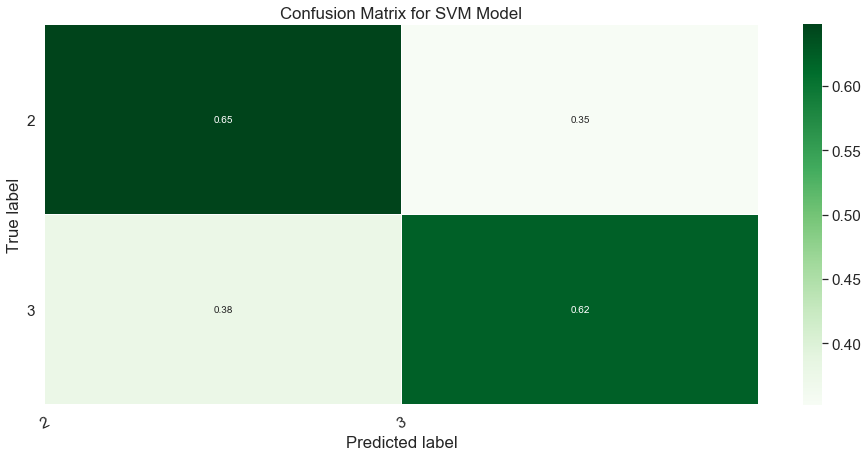

In [28]:
matrix = confusion_matrix(y_test, predictions)
matrix = matrix.astype('float') / matrix.sum(axis=1)[:, np.newaxis]

# Build the plot
plt.figure(figsize=(16,7))
sns.set(font_scale=1.4)
sns.heatmap(matrix, annot=True, annot_kws={'size':10},
            cmap=plt.cm.Greens, linewidths=0.2)

# Add labels to the plot
class_names = ['2', '3']
tick_marks = np.arange(len(class_names))
tick_marks2 = tick_marks + 0.5
plt.xticks(tick_marks, class_names, rotation=25)
plt.yticks(tick_marks2, class_names, rotation=0)
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.title('Confusion Matrix for SVM Model')
plt.show()

### Naive Bayes

In [29]:
accuracy, precision, recall = {}, {}, {}

for key in feature_list.keys():
    
    # Define X and y test/ train/ split
    X=data_2_3[feature_list[key]]  # Features  
    y=data_2_3['Severity']  # Labels
    X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.2, 
                                                    random_state=0, 
                                                    shuffle=True, 
                                                    stratify=y)
    clf=GaussianNB()  #defining classifier method
    clf.fit(X_train,y_train)                   # training classifier 
    
    # Prediction 
    predictions = clf.predict(X_test)
    
    # Calculate Accuracy, Precision and Recall Metrics
    accuracy[key] = balanced_accuracy_score(predictions, y_test) 
    precision[key] = precision_score(predictions, y_test, average='weighted')
    recall[key] = recall_score(predictions, y_test, average='weighted')

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UserWarning: y_pred contains classes not in y_true
  warnings.warn('y_pred contains classes not in y_true')
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1145: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)


In [30]:
df_model = pd.DataFrame(index=feature_list.keys())
df_model['Balanced Accuracy'] = accuracy.values()
df_model['Precision'] = precision.values()
df_model['Recall'] = recall.values()

df_model

,Balanced Accuracy,Precision,Recall
All,0.599327,0.606178,0.602371
Wu,0.592894,0.628051,0.623563
Mencar,0.568331,0.805173,0.627874
Ustun,0.595498,0.703420,0.637931
Huang,0.606645,0.879940,0.641164
Rodruiges,0.597166,0.633157,0.627874
Demographic,0.575804,0.726378,0.627155
Measurements,0.574110,0.593540,0.598060
Comorbidities,0.551181,0.619237,0.496408
Symptoms,0.571034,0.903803,0.631106


##### Confusion matrix for model with highest balanced accuracy

In [31]:
X=data_2_3[huang]  # Features  
y=data_2_3['Severity']  # Labels
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.2, 
                                                    random_state=0, 
                                                    shuffle=True, 
                                                    stratify=y)
clf=GaussianNB()  #defining classifier method
clf.fit(X_train,y_train)                   # training classifier 
    
# Prediction 
predictions = clf.predict(X_test)

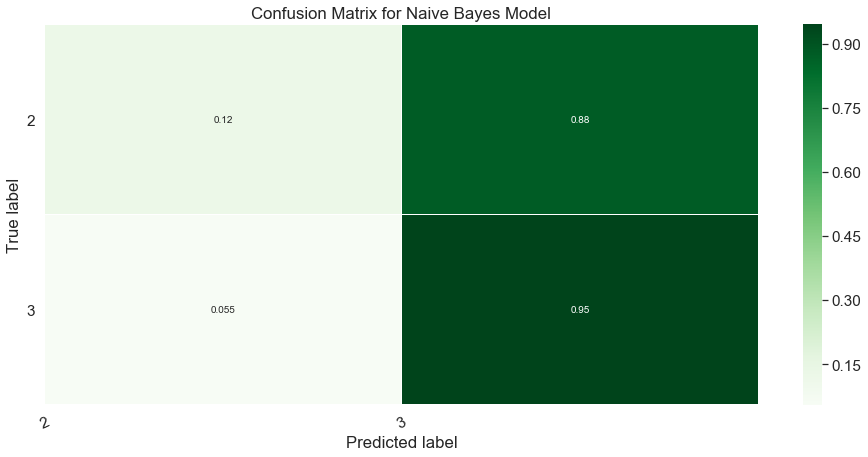

In [32]:
matrix = confusion_matrix(y_test, predictions)
matrix = matrix.astype('float') / matrix.sum(axis=1)[:, np.newaxis]

# Build the plot
plt.figure(figsize=(16,7))
sns.set(font_scale=1.4)
sns.heatmap(matrix, annot=True, annot_kws={'size':10},
            cmap=plt.cm.Greens, linewidths=0.2)

# Add labels to the plot
class_names = ['2', '3']
tick_marks = np.arange(len(class_names))
tick_marks2 = tick_marks + 0.5
plt.xticks(tick_marks, class_names, rotation=25)
plt.yticks(tick_marks2, class_names, rotation=0)
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.title('Confusion Matrix for Naive Bayes Model')
plt.show()

### Logistic Regression

In [33]:
accuracy, precision, recall = {}, {}, {}

for key in feature_list.keys():
    
    # Define X and y test/ train/ split
    X=data_2_3[feature_list[key]]  # Features  
    y=data_2_3['Severity']  # Labels
    X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.2, 
                                                    random_state=0, 
                                                    shuffle=True, 
                                                    stratify=y)
    clf=LogisticRegression(class_weight='balanced', random_state = 0, solver = 'lbfgs', max_iter = 5000)  #defining classifier method
    clf.fit(X_train,y_train)                   # training classifier 
    
    # Prediction 
    predictions = clf.predict(X_test)
    
    # Calculate Accuracy, Precision and Recall Metrics
    accuracy[key] = balanced_accuracy_score(predictions, y_test) 
    precision[key] = precision_score(predictions, y_test, average='weighted')
    recall[key] = recall_score(predictions, y_test, average='weighted')

In [34]:
df_model = pd.DataFrame(index=feature_list.keys())
df_model['Balanced Accuracy'] = accuracy.values()
df_model['Precision'] = precision.values()
df_model['Recall'] = recall.values()

df_model

,Balanced Accuracy,Precision,Recall
All,0.626860,0.635318,0.633621
Wu,0.610664,0.618434,0.612428
Mencar,0.575350,0.581053,0.582615
Ustun,0.598385,0.605530,0.606681
Huang,0.609847,0.617492,0.612069
Rodruiges,0.607440,0.615045,0.608836
Demographic,0.573091,0.580108,0.584411
Measurements,0.594762,0.602238,0.592672
Comorbidities,0.546640,0.592224,0.504310
Symptoms,0.560897,0.566701,0.570761


##### Confusion matrix for model with highest balanced accuracy

In [35]:
X=data_2_3[features]  # Features  
y=data_2_3['Severity']  # Labels
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.2, 
                                                    random_state=0, 
                                                    shuffle=True, 
                                                    stratify=y)
clf=LogisticRegression(class_weight='balanced', random_state = 0, solver = 'lbfgs', max_iter = 5000)  #defining classifier method
clf.fit(X_train,y_train)                   # training classifier 
    
# Prediction 
predictions = clf.predict(X_test)

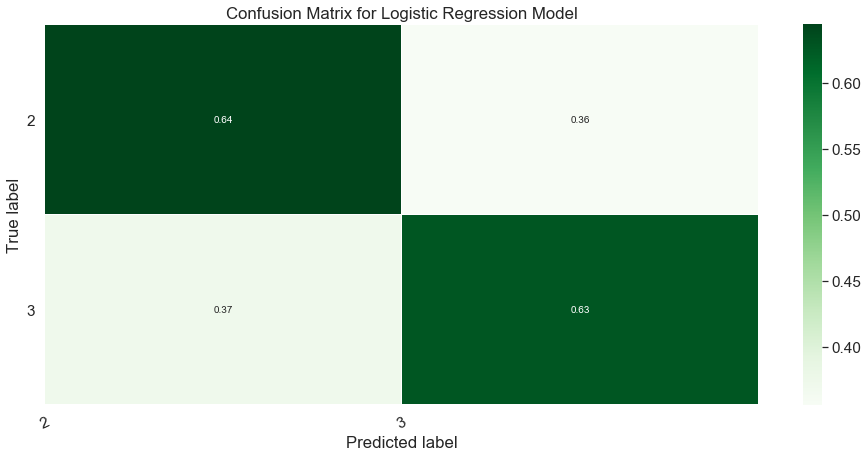

In [36]:
matrix = confusion_matrix(y_test, predictions)
matrix = matrix.astype('float') / matrix.sum(axis=1)[:, np.newaxis]

# Build the plot
plt.figure(figsize=(16,7))
sns.set(font_scale=1.4)
sns.heatmap(matrix, annot=True, annot_kws={'size':10},
            cmap=plt.cm.Greens, linewidths=0.2)

# Add labels to the plot
class_names = ['2', '3']
tick_marks = np.arange(len(class_names))
tick_marks2 = tick_marks + 0.5
plt.xticks(tick_marks, class_names, rotation=25)
plt.yticks(tick_marks2, class_names, rotation=0)
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.title('Confusion Matrix for Logistic Regression Model')
plt.show()